LMC / SMC field plots using IMACS spectroscopic results and Gaia DR2 information

*The proper motion and vhelio plots are quite similar to those in the HYDRA file, so I will not be showing those. This file is to demonstrate the difference between the HYDRA logg vs teff CMD and the IMACS (mmag - imag) vs mmag CMD.*

In [1]:
import astropy
from astropy.io import fits
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# This is import is not necessary but I include it from time to time
import warnings
warnings.filterwarnings('ignore')

Open FITS file and define necessary parameters

In [2]:
imacs_gaia = fits.open(r"/Users/devinmcdonald/Desktop/LMC-SMC/imacs_dec07_gaiadr2.fits")
imacs_gaia_info = imacs_gaia[1].data

In [3]:
params = ['IMAG', 'MMAG', 'VHELIO', 
          'FIELD', 'PMML', 'PMMB']

var = {f: imacs_gaia_info[f] for f in params}

imag = var['IMAG']
mmag = var['MMAG']
vhelio = var['VHELIO']
field = var['FIELD']
pmml = var['PMML']
pmmb = var['PMMB']

Create a function to display all possible field options (not necessary); I will be working with field 100L255a

In [4]:
def unique(_list_): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in _list_: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    return np.array(unique_list)

unique(field)

array(['100L255a', '106S206', '106S296', '125S026a', '125S251a',
       '125S296a', '125S341a', '130L008a', '130L181a', '130L274a',
       '130L336a', '160L130b', '160L155b', '160L180b', '160L206a',
       '160L257b', '160L307a', '160L358a', '190L118b', '190L182b',
       '190L268b', '190L290a', '40S296', '62S296', '73S026', '84S026',
       '73S116', '73S206', '84S206', '73S296', '95S026', '84S116',
       '95S116', '95S206', '84S251'], dtype='<U8')

Define a preliminary cut based on the field of choice and vhelio

In [5]:
m_i_mag = mmag-imag

prelim_cut = ((vhelio >= -100) &
            
            (vhelio <= 400) &
            
            (field == '100L255a'))
   
pm_i_mag = m_i_mag[prelim_cut]
pimag = imag[prelim_cut]
pmmag = mmag[prelim_cut]
ppmml = pmml[prelim_cut]
ppmmb = pmmb[prelim_cut]
pvhelio = vhelio[prelim_cut]
pfield = field[prelim_cut]

Define a cut based on proper motion and differentiate between those stars within the cut and those outside

-pm in milli l and milli b

-cut within 2" of 1.8 pmml and 0.4 pmmb

In [6]:
pm_cut = (((ppmml-1.8)**2 + (ppmmb-0.4)**2 <= 4) &

              (pfield == '100L255a'))

imag_cut = pimag[pm_cut]
mmag_cut = pmmag[pm_cut]
vhelio_cut = pvhelio[pm_cut]
m_i_mag_cut = pm_i_mag[pm_cut]

Alternative way of defining stars within the cut and stars outside (compared to the method I used in the HYDRA file)

In [7]:
imag_outside = [i for i in pimag if pimag not in imag_cut]
mmag_outside = [i for i in pmmag if pmmag not in mmag_cut]
vhelio_outside = [i for i in pvhelio if pvhelio not in vhelio_cut]
m_i_mag_outside = [i for i in pm_i_mag if pm_i_mag not in m_i_mag_cut]

LMC isochrone information

In [8]:
iso = np.genfromtxt(fname='/Users/devinmcdonald/Desktop/LMC-SMC/lmc_isochrone.txt')
iso_x = np.hsplit(iso,2)[0]
iso_y = np.hsplit(iso,2)[1]

CMD of stars (that passed the preliminary cut) within field 100L255a

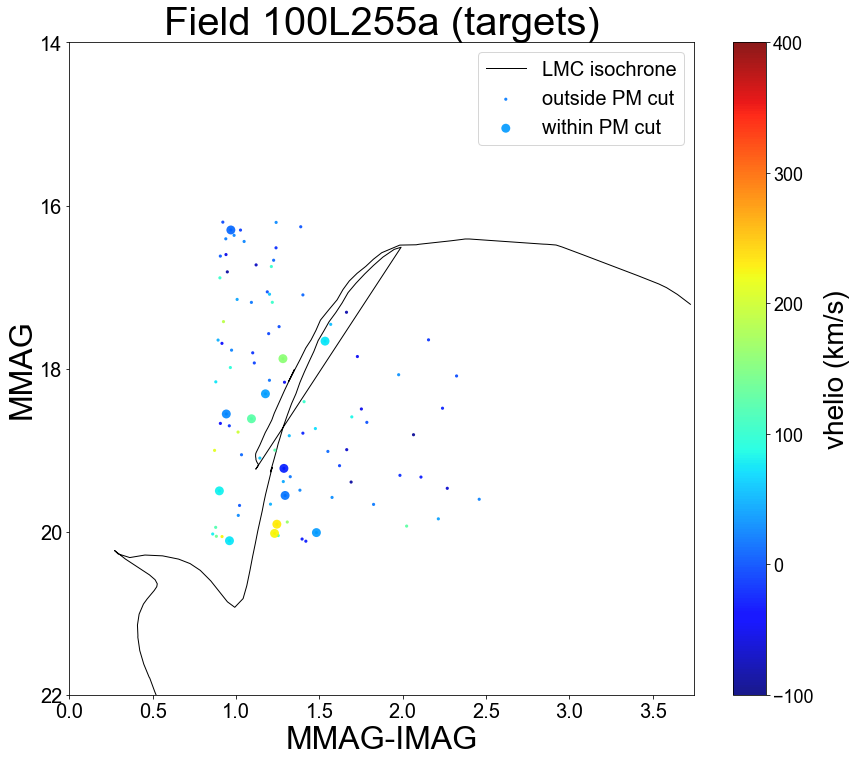

In [9]:
fig, ax = plt.subplots()

norm_pm = mpl.colors.Normalize(vmin=-100,vmax=400)

outside = plt.scatter(m_i_mag_outside, mmag_outside, s = 10, alpha = 0.9, marker = 'o', cmap = 'jet', c=vhelio_outside, lw = 0, norm=norm_pm)
inside = plt.scatter(m_i_mag_cut, mmag_cut, s = 80, alpha = 0.9, marker = 'o', cmap = 'jet', c=vhelio_cut, lw = 0, norm = norm_pm)
iso_plt = plt.plot(iso_x, iso_y, color = 'black', lw = 1, markersize = 0, zorder = 0)

plt.xlabel('MMAG-IMAG', fontsize = 32)
plt.ylabel('MMAG', fontsize = 32)

plt.legend(['LMC isochrone', 'outside PM cut', 'within PM cut'], fontsize = 20)

clb_x = plt.colorbar(inside)
clb_x.ax.tick_params(labelsize=18) 
clb_x.ax.set_ylabel('vhelio (km/s)', fontsize = 28, labelpad=10)

plt.xlim(0,3.75)
plt.ylim(22,14)
plt.xticks(np.arange(min(plt.xlim()),max(plt.xlim()), 0.5), fontsize = 20)
plt.yticks(np.arange(min(plt.ylim()),max(plt.ylim()) +1, 2), fontsize = 20)

plt.title('Field 100L255a (targets)', fontsize = 40)
sns.set_style("ticks")

fig.set_size_inches(14,12)